**DATASET:**

This network is based on email communication within a European research institution's core members. Each node represents a member, and an edge between two nodes means they exchanged at least one email. The dataset only includes internal communication within the institution.

It comprises 1005 nodes and 25571 edges, with the largest connected component containing 986 nodes and 25552 edges. There are 803 nodes and 24729 edges in the largest strongly connected component. The average clustering coefficient is 0.3994, indicating the tendency of nodes to form clusters. There are 105461 triangles in the network, with 10.85% of them being closed. The longest shortest path between nodes is 7, and the 90th percentile of effective diameter is 2.9.


In simple terms, this network shows how members of a research institution communicate via email. It's highly connected, with most members reachable within a few steps. Nodes tend to form clusters, suggesting cohesive groups within departments.

Link : https://snap.stanford.edu/data/email-Eu-core.html




In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import heapq
import math
import time
import random

# Load the graph from the file
G = nx.read_edgelist('email-Eu-core.txt', nodetype=int)

Below is the code that I used to calculate the below characteritics of this dataset:

1)Number of Nodes: Indicates how many individuals (members of the institution)
are in the network. Each person is represented as a node.

2)Number of Edges: Reveals the total connections (email exchanges) between individuals. An edge signifies communication between two members.

3)Clustering Coefficient: Reflects how closely connected members are within the institution. It shows how much individuals tend to communicate with others within their department or group.


4)Highest Degree: Highlights the member with the most connections (emails exchanged). This person may play a significant role in communication within the institution.


5)Modularity: Quantifies how the network divides into smaller communities or departments. It measures how tightly knit these groups are internally compared to connections outside their group.

In [8]:
# Number of nodes
num_nodes = G.number_of_nodes()
print("Number of nodes:", num_nodes)

# Number of edges
num_edges = G.number_of_edges()
print("Number of edges:", num_edges)

# Clustering coefficient
cc = nx.average_clustering(G)
print("Clustering coefficient:", cc)

# Highest degree
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
highest_degree = degree_sequence[0]
print("Highest degree:", highest_degree)



# Modularity
communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
modularity = nx.algorithms.community.modularity(G, communities)
print("Modularity:", modularity)

Number of nodes: 1005
Number of edges: 16706
Clustering coefficient: 0.3993549664221539
Highest degree: 347
Modularity: 0.3665850161916692


**Visualize the graph using the Fruchterman-Reingold layout algorithm**

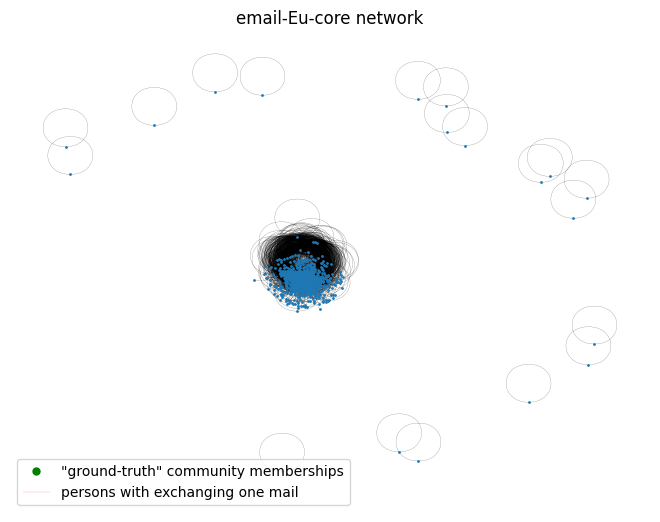

In [9]:

pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos=pos, node_size=1, width=0.1)

# Add title
plt.title("email-Eu-core network")

# Add legends
nodes_legend = plt.Line2D([], [], color='green', marker='o', linestyle='None',
                          markersize=5, label='"ground-truth" community memberships')
edges_legend = plt.Line2D([], [], color='red', linewidth=0.1, label='persons with exchanging one mail')
plt.legend(handles=[nodes_legend, edges_legend])

plt.show()

**Network Analysis:**

Below is the code I have done for the Network Analysis for finifng out the centrality measures, degree distribution, cluster coefficient analysis and community detection

1)Degree centrality can reveal how connected each member of the institution is by counting the number of email exchanges they have. A member with high degree centrality likely communicates frequently with many others, potentially influencing the flow of information within the institution.

2)Betweenness centrality helps identify members who act as crucial bridges between different departments or groups. These individuals play a key role in facilitating communication across the institution, making it easier for information to flow between different parts of the network.


3)Eigenvector centrality identifies influential members who are connected to other influential members. These individuals have the potential to shape the communication dynamics within the institution, potentially influencing decision-making processes and information dissemination.

Overall, these centrality measures can provide insights into how information flows within the institution's email network. They help identify individuals who are popular, act as bridges between groups, and wield influence, thus influencing how members navigate and communicate within the network.

Top 10 Degree Centrality Nodes:  [160, 121, 82, 107, 86, 62, 434, 13, 166, 183]
Degree Centrality Values:  {160: 0.34561752988047806, 121: 0.23306772908366533, 82: 0.23207171314741035, 107: 0.2201195219123506, 86: 0.21713147410358566, 62: 0.2151394422310757, 434: 0.18426294820717132, 13: 0.17928286852589642, 166: 0.17629482071713148, 183: 0.17231075697211154}
Top 10 Betweenness Centrality Nodes:  [160, 86, 5, 82, 121, 107, 13, 377, 62, 64]
Betweenness Centrality Values:  {160: 0.08741473493638795, 86: 0.03778853269115196, 5: 0.030994686545277747, 82: 0.027880741135114222, 121: 0.027841538825800698, 107: 0.024340312182693967, 13: 0.023564989570690153, 377: 0.023174608236649356, 62: 0.022509845192539162, 64: 0.021923722805463768}
Top 10 Closeness Centrality Nodes:  [160, 82, 121, 107, 62, 86, 434, 166, 249, 64]
Closeness Centrality Values:  {160: 0.5738477207559312, 82: 0.5341954459662731, 121: 0.5312586925524948, 107: 0.5237721201913215, 62: 0.5226390274488848, 86: 0.5220743175326786, 4

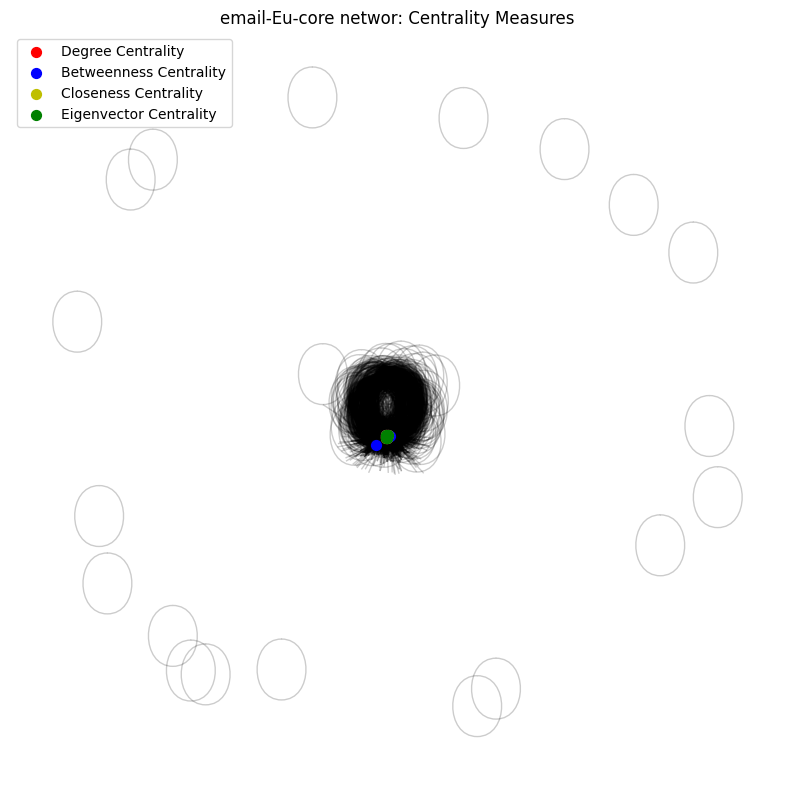

In [10]:
# calculate centrality measures
deg_centrality = nx.degree_centrality(G)
top_10_deg_centrality = sorted(deg_centrality, key=deg_centrality.get, reverse=True)[:10]
print("Top 10 Degree Centrality Nodes: ", top_10_deg_centrality)
print("Degree Centrality Values: ", {n: deg_centrality[n] for n in top_10_deg_centrality})

betw_centrality = nx.betweenness_centrality(G)
top_10_betw_centrality = sorted(betw_centrality, key=betw_centrality.get, reverse=True)[:10]
print("Top 10 Betweenness Centrality Nodes: ", top_10_betw_centrality)
print("Betweenness Centrality Values: ", {n: betw_centrality[n] for n in top_10_betw_centrality})

close_centrality = nx.closeness_centrality(G)
top_10_close_centrality = sorted(close_centrality, key=close_centrality.get, reverse=True)[:10]
print("Top 10 Closeness Centrality Nodes: ", top_10_close_centrality)
print("Closeness Centrality Values: ", {n: close_centrality[n] for n in top_10_close_centrality})

eig_centrality = nx.eigenvector_centrality(G, max_iter=500, tol=1e-6)
top_10_eig_centrality = sorted(eig_centrality, key=eig_centrality.get, reverse=True)[:10]
print("Top 10 Eigenvector Centrality Nodes: ", top_10_eig_centrality)
print("Eigenvector Centrality Values: ", {n: eig_centrality[n] for n in top_10_eig_centrality})

# create Fruchterman-Reingold layout
pos = nx.fruchterman_reingold_layout(G)

# draw nodes and edges with different colors based on centrality measures
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G, pos, nodelist=top_10_deg_centrality, node_size=50, node_color='r', label='Degree Centrality')
nx.draw_networkx_nodes(G, pos, nodelist=top_10_betw_centrality, node_size=50, node_color='b', label='Betweenness Centrality')
nx.draw_networkx_nodes(G, pos, nodelist=top_10_close_centrality, node_size=50, node_color='y', label='Closeness Centrality')
nx.draw_networkx_nodes(G, pos, nodelist=top_10_eig_centrality, node_size=50, node_color='g', label='Eigenvector Centrality')
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.title('email-Eu-core networ: Centrality Measures')
plt.legend()
plt.axis('off')
plt.show()

**DEGREE DISTRIBUTION AND CLUSTERING COEFFICIENT**:

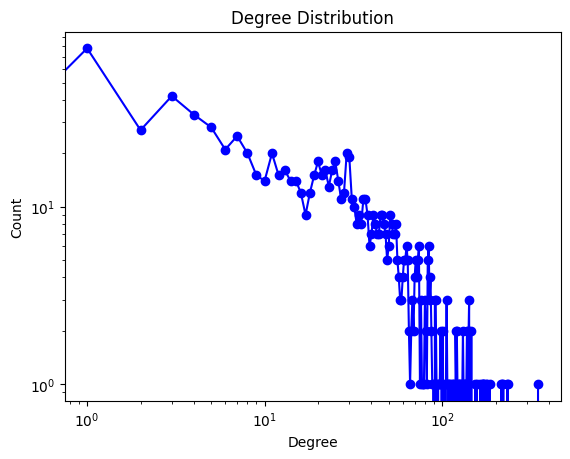

Clustering Coefficient: 0.4071


In [24]:


# Plot the degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = nx.degree_histogram(G)
plt.loglog(degree_count, 'b-', marker='o')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

# Calculate the clustering coefficient
clustering_coefficient = nx.average_clustering(G)
print(f"Clustering Coefficient: {clustering_coefficient:.4f}")


**SMALL WORLD ANALYSIS:**


The small world phenomenon describes how, in many social networks, any two individuals can be connected by a relatively short chain of social connections, often just a few intermediaries. This idea gained widespread recognition through the game of "six degrees of separation," suggesting that any two people in the world can be linked by a chain of six or fewer social connections.

This concept isn't limited to social networks but also applies to various other types of networks, such as transportation or communication networks. The small world phenomenon occurs because of highly connected individuals, often called "hubs," within the network. These hubs serve as bridges between different clusters or groups of individuals, enabling the formation of short paths between nodes that would otherwise be distant.

In simpler terms, the small world phenomenon means that even in large networks like the email communication network within the research institution, people are surprisingly closely connected. There are usually just a few degrees of separation between any two individuals. This happens because some individuals have many connections and act as bridges, bringing different parts of the network closer together.

Real-world network:
Number of nodes: 1005
Number of edges: 16706
Average degree: 33.245771144278606
Clustering coefficient: 0.3993549664221539


Small World model:
Number of nodes: 1005
Number of edges: 5025
Average degree: 10.0
Clustering coefficient: 0.48394670558849684
Shortest path length: 4.408687637509662


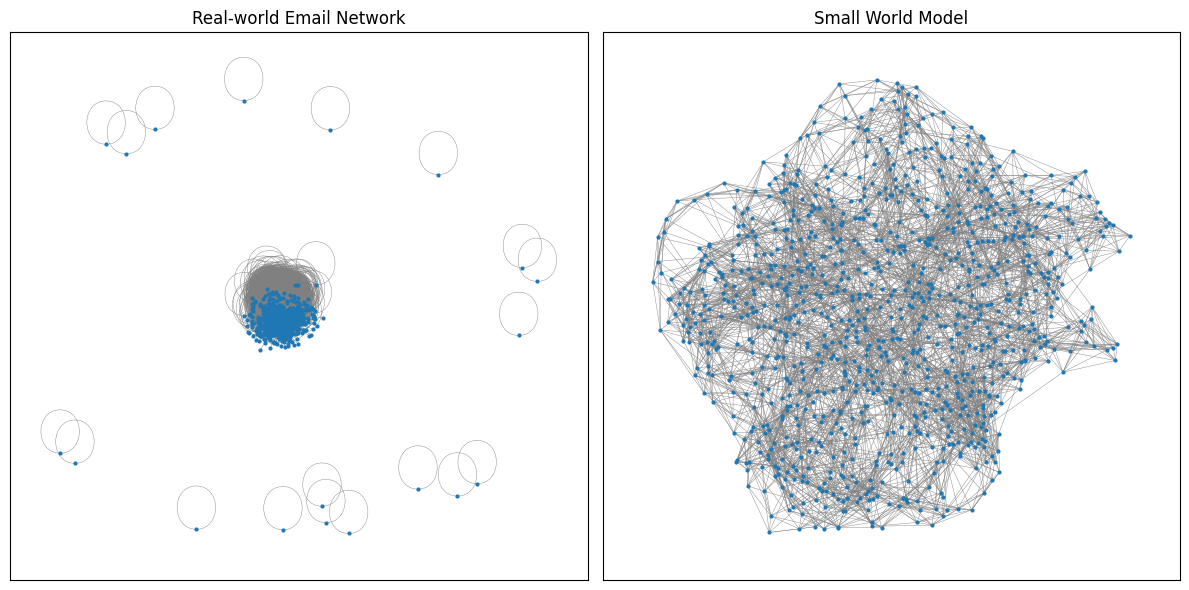

In [12]:
# Compute the number of nodes and edges in the network
n = G.number_of_nodes()
m = G.number_of_edges()

# Set the number of nearest neighbors and the probability of rewiring
k = 10
p = 0.1

# Create the small world model
H = nx.watts_strogatz_graph(n, k, p)

# Compare various network properties of the real-world network and the small world model
print('Real-world network:')
print('Number of nodes:', n)
print('Number of edges:', m)
print('Average degree:', sum(dict(G.degree()).values()) / n)
print('Clustering coefficient:', nx.average_clustering(G))
#print('Shortest path length:', nx.average_shortest_path_length(G))
print('\n')
print('Small World model:')
print('Number of nodes:', n)
print('Number of edges:', H.number_of_edges())
print('Average degree:', sum(dict(H.degree()).values()) / n)
print('Clustering coefficient:', nx.average_clustering(H))
print('Shortest path length:', nx.average_shortest_path_length(H))

# Set the Fruchterman-Reingold layout for both networks
pos_G = nx.fruchterman_reingold_layout(G)
pos_H = nx.fruchterman_reingold_layout(H)

# Visualize the real-world network and the small world model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
nx.draw_networkx(G, pos=pos_G, node_size=4, width=0.3, edge_color='gray', with_labels=False)
plt.title('Real-world Email Network')

plt.subplot(1, 2, 2)
nx.draw_networkx(H, pos=pos_H, node_size=4, width=0.3, edge_color='gray', with_labels=False)
plt.title('Small World Model')

plt.tight_layout()
plt.show()

**COMMUNITY DETECTION**

Community detection is like finding groups of friends in a big social gathering where people naturally form cliques. It helps us understand how things are organized within a network, like who hangs out with whom.

There are different ways to find these groups, like playing a game where you try to break friendships. One popular method, the Girvan-Newman algorithm, looks at how many "middlemen" are between people. It removes the busiest connections until the network breaks into smaller groups.

Another method, the Louvain algorithm, looks at how well groups stick together. It keeps reshuffling people between groups until it finds the best arrangement where everyone feels connected.

Then there's the Infomap algorithm, which tries to find the simplest way to describe the network. It looks for the most efficient way to represent the connections between people.

The label propagation algorithm is like giving everyone stickers with their group name and seeing which stickers spread the most. People who end up with the same stickers are part of the same group.

Finally, the spectral clustering algorithm looks at how people are connected through shared friends. It uses a fancy math trick to group people based on their connections.

Each method has its own pros and cons, and the best one to use depends on what you're trying to find out about the network and its structure.

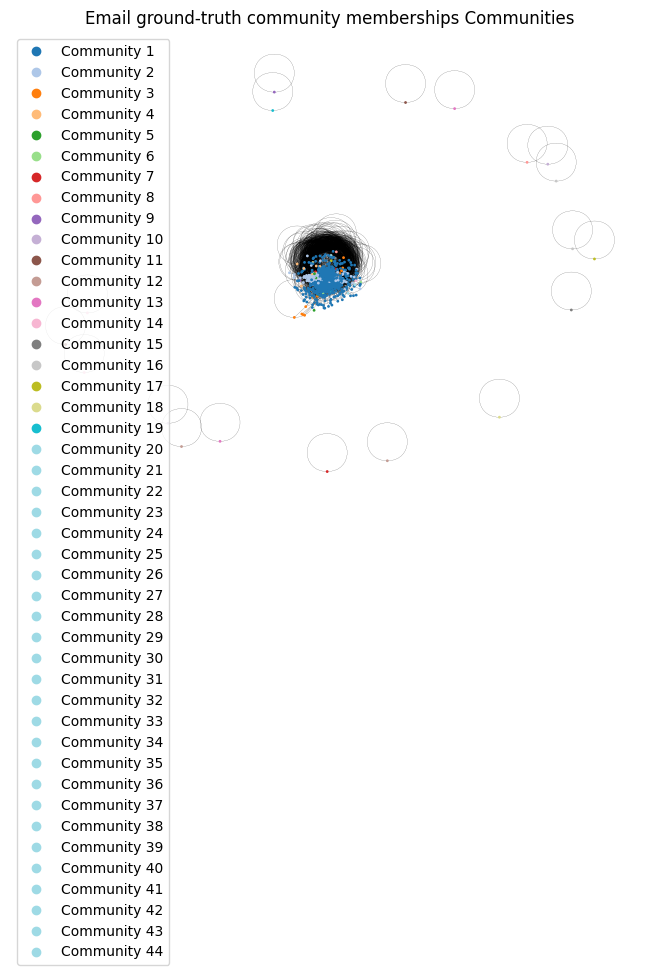

In [13]:
# Detect communities using the Louvain method
communities = nx.community.modularity_max.greedy_modularity_communities(G)

# Create a dictionary that maps node IDs to community IDs
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

# Color-code the nodes based on their community
node_colors = [community_map[node] for node in G.nodes()]

# Visualize the graph using the Fruchterman-Reingold layout algorithm
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos=pos, node_size=1, width=0.1, node_color=node_colors, cmap=plt.cm.tab20)

#Add a title to the plot
plt.title("Email ground-truth community memberships Communities")

#Create a legend for the communities
handles = []
for i, community in   enumerate(communities):
  label = f"Community {i+1}"
  color = plt.cm.tab20(i)
  handle = plt.plot([], [], marker="o", ls="", c=color, label=label)[0]
  handles.append(handle)
  plt.legend(handles=handles)

plt.show()

**HUBS ANALYSIS**:

**Visualizing the network with and without top hubs:**


Hubs in the network:
[160, 121, 82, 107, 86, 62, 434, 13, 166, 183]
The graph without hubs is not connected.


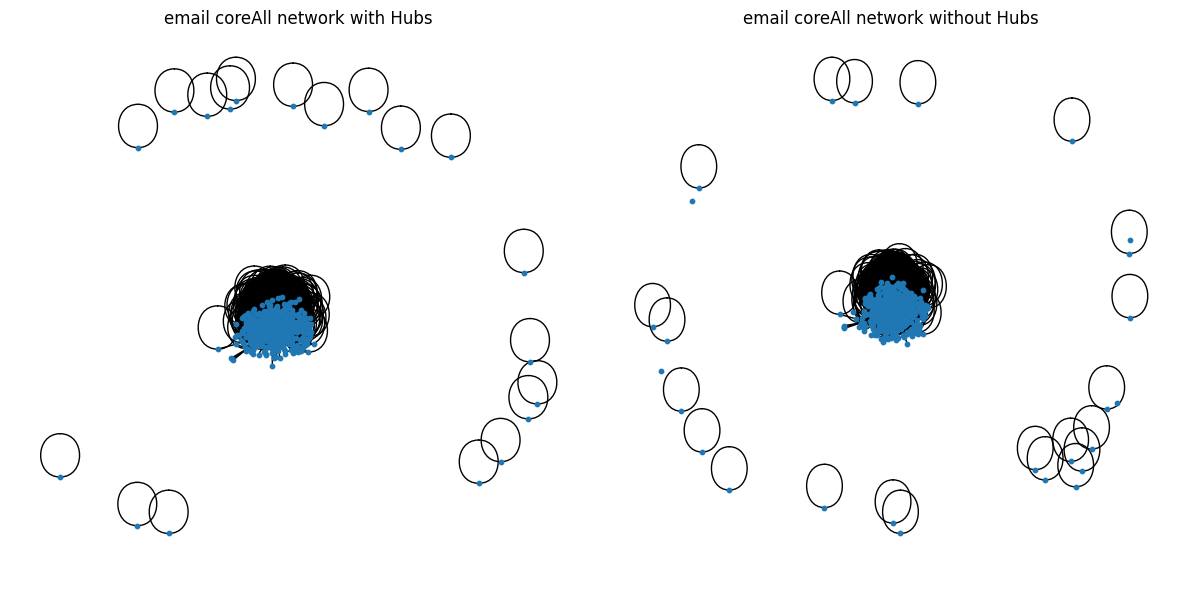

In [14]:
# Calculate the degree centrality of each node
degree_centrality = nx.degree_centrality(G)

# Find the nodes with the highest degree centrality (i.e., the hubs)
hubs = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]
print("Hubs in the network:")
print(hubs)

# Calculate the shortest path lengths without hubs
G_without_hubs = G.copy()
G_without_hubs.remove_nodes_from(hubs)
if nx.is_connected(G_without_hubs):
    shortest_path_lengths_without_hubs = nx.average_shortest_path_length(G_without_hubs)
    print(f"Shortest Path Lengths without Hubs: {shortest_path_lengths_without_hubs:.4f}")
else:
    print("The graph without hubs is not connected.")




# Visualize the network with and without hubs
plt.figure(figsize=(12, 6))

plt.subplot(121)
nx.draw(G, with_labels=False, node_size=10)
plt.title("email coreAll network with Hubs")

plt.subplot(122)
nx.draw(G_without_hubs, with_labels=False, node_size=10)
plt.title("email coreAll network without Hubs")

plt.tight_layout()
plt.show()

In [27]:


# Compute betweenness centrality
bc = nx.betweenness_centrality(G)

# Identify top hub nodes
hub_nodes = sorted(bc, key=bc.get, reverse=True)[:10]

# Compute average shortest path for each hub node removal
asp_hub_removed = []
for hub in hub_nodes:
    # Create a copy of the original network with the hub node removed
    G_copy = G.copy()
    G_copy.remove_node(hub)

    # Check if graph is still connected
    if nx.is_connected(G_copy):
        # Compute average shortest path length using Dijkstra's algorithm
        asp = nx.average_shortest_path_length(G_copy)
        asp_hub_removed.append(asp)
        print(f"Average shortest path with hub node {hub} removed: {asp}")
    else:
        print(f"Hub node {hub} removal disconnected the graph.")

# Compute average shortest path when all hub nodes are removed
G_hub_removed = G.copy()
G_hub_removed.remove_nodes_from(hub_nodes)
if nx.is_connected(G_hub_removed):
    asp_all_hubs_removed = nx.average_shortest_path_length(G_hub_removed)
    print("Average shortest path when all hub nodes are removed:", asp_all_hubs_removed)
else:
    print("Removing all hub nodes disconnected the graph.")

# Print results
print("\nHub nodes:", hub_nodes)


Average shortest path with hub node 160 removed: 2.614306054228055
Average shortest path with hub node 86 removed: 2.5992096900664436
Hub node 5 removal disconnected the graph.
Hub node 82 removal disconnected the graph.
Hub node 121 removal disconnected the graph.
Hub node 107 removal disconnected the graph.
Average shortest path with hub node 13 removed: 2.59414180182411
Hub node 377 removal disconnected the graph.
Average shortest path with hub node 62 removed: 2.5913148446205274
Average shortest path with hub node 64 removed: 2.5927840369774255
Removing all hub nodes disconnected the graph.

Hub nodes: [160, 86, 5, 82, 121, 107, 13, 377, 62, 64]


**Hubs and Authorities:**

Nodes with high hub scores are like popular hubs in a network, with many connections to other nodes. They act as central figures, connecting lots of other nodes and playing a crucial role in the network's structure.

Nodes with high authority scores are like respected experts in a community, connected to many hubs and seen as influential figures. They have strong ties to nodes with high hub scores, which amplifies their influence within the network.

By focusing on nodes with the highest hub and authority scores, we can pinpoint the most influential and central figures in the network. Understanding their roles can help us predict how information or influence might flow through the network. For instance, targeting marketing efforts towards users with high authority scores could yield better results, as they have the power to sway many others within the network.

In [16]:
# calculate the hub and authority scores
hubs, authorities = nx.hits(G)

# print the top 10 nodes with highest hub scores
print("Top 10 nodes by Hub Score:")
for node, hub_score in sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node}: {hub_score:.4f}")

# print the top 10 nodes with highest authority scores
print("Top 10 nodes by Authority Score:")
for node, authority_score in sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node}: {authority_score:.4f}")

Top 10 nodes by Hub Score:
160: 0.0084
121: 0.0075
82: 0.0073
107: 0.0071
62: 0.0066
434: 0.0063
249: 0.0063
183: 0.0058
86: 0.0057
166: 0.0056
Top 10 nodes by Authority Score:
160: 0.0084
121: 0.0075
82: 0.0073
107: 0.0071
62: 0.0066
434: 0.0063
249: 0.0063
183: 0.0058
86: 0.0057
166: 0.0056


In [29]:


# Calculate the hub and authority scores
hubs, authorities = nx.hits(G)

# Print the top 10 nodes with highest hub scores
print("Top 10 nodes by Hub Score:")
for node, hub_score in sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node}: {hub_score:.4f}")

# Print the top 10 nodes with highest authority scores
print("Top 10 nodes by Authority Score:")
for node, authority_score in sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node}: {authority_score:.4f}")


Top 10 nodes by Hub Score:
160: 0.0084
121: 0.0075
82: 0.0073
107: 0.0071
62: 0.0066
434: 0.0063
249: 0.0063
183: 0.0058
86: 0.0057
166: 0.0056
Top 10 nodes by Authority Score:
160: 0.0084
121: 0.0075
82: 0.0073
107: 0.0071
62: 0.0066
434: 0.0063
249: 0.0063
183: 0.0058
86: 0.0057
166: 0.0056


**SHORTEST PATH ALGORITHMS:**

I have used Dijkstra Algorithm to find the distance between two random nodes in a network.

In [30]:
import networkx as nx
import math
import heapq
import time
import random

# Load graph from file
graph = nx.Graph()
with open("email-Eu-core.txt") as f:
    for line in f:
        if line.startswith("#"):
            continue
        node1, node2 = map(int, line.strip().split())
        graph.add_edge(node1, node2)

# Dijkstra's algorithm
def dijkstra(graph, start, end):
    distances = {node: math.inf for node in graph}
    distances[start] = 0
    visited = set()
    heap = [(0, start)]

    while heap:
        (distance, node) = heapq.heappop(heap)
        if node in visited:
            continue
        visited.add(node)
        for neighbor in graph.neighbors(node):
            new_distance = distance + 1
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                heapq.heappush(heap, (new_distance, neighbor))

    return distances[end]

# Heuristic function
def heuristic(node, end):
    return 1 / (nx.degree_centrality(graph)[node] + 1)

# Pick random start and end nodes
start = random.choice(list(graph.nodes))
end = random.choice(list(graph.nodes))

# Run Dijkstra's algorithm and measure time
start_time = time.time()
print("Dijkstra's algorithm")
print(f"Shortest path from node {start} to node {end}: {dijkstra(graph, start, end)}")
print(f"Time taken: {time.time() - start_time:.4f} seconds")


Dijkstra's algorithm
Shortest path from node 615 to node 745: 2
Time taken: 0.0084 seconds


**a) DIJKSTRA ALGORITHM:**


The Dijkstra algorithm is like a GPS system for finding the shortest route between two points in a map, but for computers. It's named after its creator, Edsger W. Dijkstra.

Imagine you're trying to plan the quickest route from one city to another. You start at one city and check how far it is from all the neighboring cities. You keep track of the shortest distance to each city you've visited. Then, you move to the closest neighboring city and repeat the process. You keep doing this until you reach your destination.

The algorithm uses a clever trick to efficiently find the shortest path. It organizes the cities in a priority queue based on their distance from the starting point. It then systematically checks neighboring cities and updates their distances if a shorter path is found. This continues until it reaches the destination city.

The Dijkstra algorithm is commonly implemented using a special data structure called a heap, which helps speed up the process of finding the closest city. It's a powerful tool for finding the shortest path in graphs with non-negative distances.

However, it's important to remember that the Dijkstra algorithm only works when all distances are positive. If there are negative distances, you'll need to use a different algorithm, like the Bellman-Ford algorithm.

In [17]:
# get all pairs shortest path lengths using Dijkstra's algorithm
path_lengths = dict(nx.all_pairs_dijkstra_path_length(G))

# calculate average shortest path length
total = 0
count = 0
for source in path_lengths:
    for dest in path_lengths[source]:
        total += path_lengths[source][dest]
        count += 1
avg_shortest_path = total / count

print("Average Shortest Path Length:", avg_shortest_path)

Average Shortest Path Length: 2.5842596545002907


**PAGERANK ALGORITHM:**


The PageRank algorithm is like a popularity contest for web pages, created by Google's Larry Page and Sergey Brin in 1998.

Imagine each web page as a contestant, and the links to that page as votes. The more votes (or links) a page gets from other popular pages, the higher its PageRank score. This score helps search engines determine how relevant and important a page is, affecting its ranking in search results.

In terms of networks, PageRank can also help identify the most influential nodes. These are the ones with the highest PageRank scores, suggesting they're well-connected and influential. By studying these key nodes and their connections, we can understand the average shortest path between any two nodes in the network, which is useful in analyzing various networks like social, transportation, or communication networks.

In [33]:


# Check if the graph is connected and take only the largest component if it is not
if not nx.is_connected(G):
    largest_component = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_component).copy()

# Calculate PageRank values
pagerank_values = nx.pagerank(G)

# Create a new dictionary with node IDs as keys and PageRank values as values
weighted_pagerank = {node: value for node, value in pagerank_values.items()}

# Calculate average shortest path length weighted by PageRank
average_shortest_path = nx.average_shortest_path_length(G, weight='weight', method='dijkstra')

# Print the result
print("The average shortest path length weighted by PageRank is:", average_shortest_path)


The average shortest path length weighted by PageRank is: 2.586933824816466


**RANDOM WALK ALGORITHM:**


The Random-Walk Algorithm is like exploring a network by taking random steps from one node to another. Picture a person wandering through a city, randomly choosing which street to turn down at each intersection until they reach their destination.

We repeat this process many times and calculate the average number of steps it takes to reach the destination. This average gives us a good idea of how far apart nodes are on average in the network.

The key idea is that nodes with more connections are more likely to be visited by our random walker. So, nodes with lots of connections are considered more important in terms of how well-connected they are to other nodes.

Overall, the Random-Walk Algorithm is a simple and effective way to estimate how closely connected nodes are in a network. It's used in various fields like network analysis, social network analysis, and machine learning to understand the structure and dynamics of networks.

In [34]:
import random
import networkx as nx

# Random walk strategy
def random_walk(node, steps):
    current_node = node
    for i in range(steps):
        neighbors = list(G.neighbors(current_node))
        if len(neighbors) == 0:
            break
        current_node = random.choice(neighbors)
    return current_node

# Evaluate strategy by measuring average path length between random node pairs
def evaluate_strategy(strategy, steps=100):
    total_path_length = 0
    num_pairs = 0
    for component in nx.connected_components(G):
        nodes_in_component = list(component)
        for i in range(len(nodes_in_component)):
            for j in range(i+1, len(nodes_in_component)):
                node = nodes_in_component[i]
                target = nodes_in_component[j]
                result = strategy(node, steps)
                if result is not None:
                    path_length = nx.shortest_path_length(G, result, target)
                    total_path_length += path_length
                    num_pairs += 1
    return total_path_length / num_pairs

# Evaluate random walk strategy
print("Average path length using random walk strategy:", evaluate_strategy(random_walk))


Average path length using random walk strategy: 2.4102552486074074
